# Time Series EDA

* Single continuous variable over (uniformly distributed) time
* Understand temporal behavior of data: trend and seasonality, cycle
* Identify underlying distribution and nature of temporal processes producing data

#### Setup 
°F = (K - 273.15) x 1.8000 + 32.00

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:

# read csv file. Specify 'datetime' column as index column, parse dates and sort index

df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

#Range of dataset and shape of dataset
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


In [3]:

df.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


* seasonality: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality
    * Quite common in economic time series. It is less common in engineering and scientific data.
    * Can help us understand underlying dynamics
* trend: long term upwards or downwards movement
* cycle: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

### Data Splitting
* Ideally all splits contain a season
* Human-based
* Percentage based
* Cross Validation

### Percentage Based

In [ ]:
#we are not randomnly picking the data points


In [4]:
# check shape of data
df.shape

(45252, 1)

In [7]:

# Lets use 70/30 train test split %

train_size = .70
n = df.shape[0]
#what index we are going to start, EX).100 rows, I want 70 rows as train size
test_start_index = round(train_size * n)
test_start_index

31676

In [8]:
# create train and test dataframe
#take all obsevations until this index
train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

In [9]:
train

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
...,...
2016-05-13 04:00:00,75.614000
2016-05-13 05:00:00,75.002000
2016-05-13 06:00:00,74.246000


In [10]:
test

,temp
datetime,
2016-05-13 09:00:00,73.112
2016-05-13 10:00:00,71.546
2016-05-13 11:00:00,71.222
2016-05-13 12:00:00,70.754
2016-05-13 13:00:00,72.644
...,...
2017-11-29 20:00:00,70.790
2017-11-29 21:00:00,72.806
2017-11-29 22:00:00,73.202


In [ ]:

# lets plot train and test

In [ ]:
#when addding in validate just ensure to capture seasonality (at least one year)

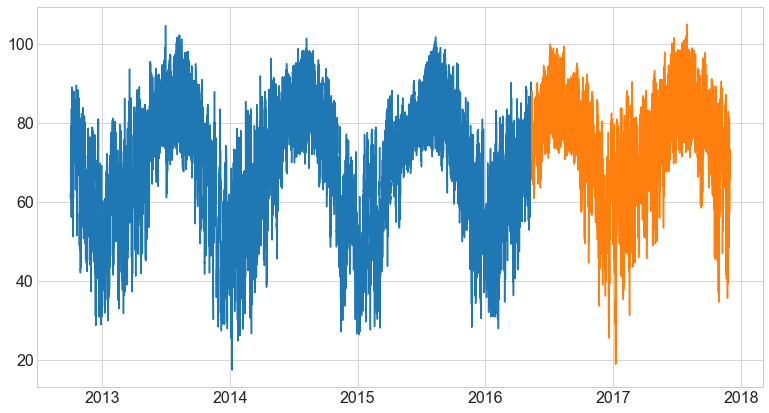

In [11]:
plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

### Human based

In [12]:
df[:'2016']

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
...,...
2016-12-31 19:00:00,63.230000
2016-12-31 20:00:00,68.216000
2016-12-31 21:00:00,70.664000


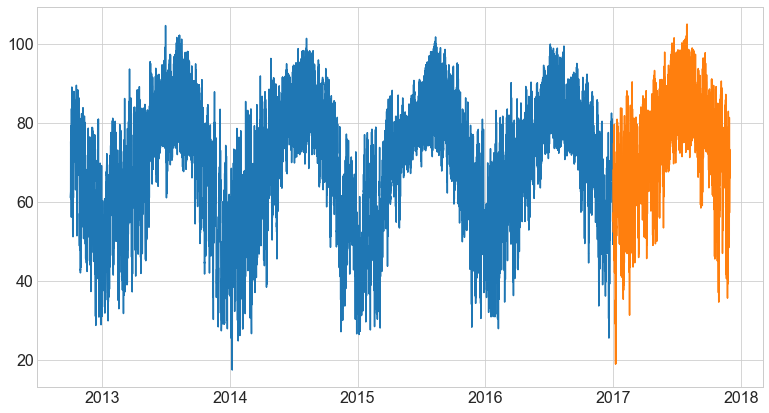

In [13]:
# Anything upto (and including) 2016 as train and rest as test
# ex). I havae four years worth of data, im going to use 2016 as train etc.  
# just making a choice on what to use as train and test based on domain knowledge

train = df[:'2016'] # includes 2016
test = df['2017']

# plot the train and test
plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

### Vizzes

In [15]:
# we will do visualization on train only:
train.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [16]:
# create a series called 'y'

y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

### Don't consider the time series

<AxesSubplot:ylabel='Frequency'>

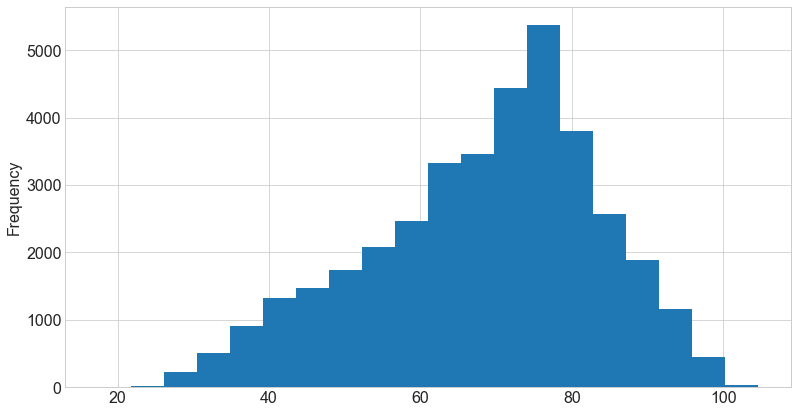

In [18]:
# plot a histogram of temperature
y.plot.hist(bins = 20)

* by month
* by weekday

In [19]:
y.index.month


Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='datetime', length=37259)

In [20]:
#make month column in train
train['month'] = y.index.month


<ipython-input-20-65cb202c491b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = y.index.month


In [21]:
train.head()

,temp,month
datetime,,
2012-10-01 13:00:00,61.052000,10
2012-10-01 14:00:00,61.076568,10
2012-10-01 15:00:00,61.139294,10
2012-10-01 16:00:00,61.202020,10
2012-10-01 17:00:00,61.264747,10


In [22]:
#can group by month and look at temperature
train.groupby('month').temp.mean()



month
1     49.831129
2     55.558854
3     61.421913
4     68.855211
5     73.742506
6     80.614231
7     83.449665
8     83.964775
9     79.356778
10    72.065809
11    60.545556
12    54.689498
Name: temp, dtype: float64

<AxesSubplot:xlabel='month'>

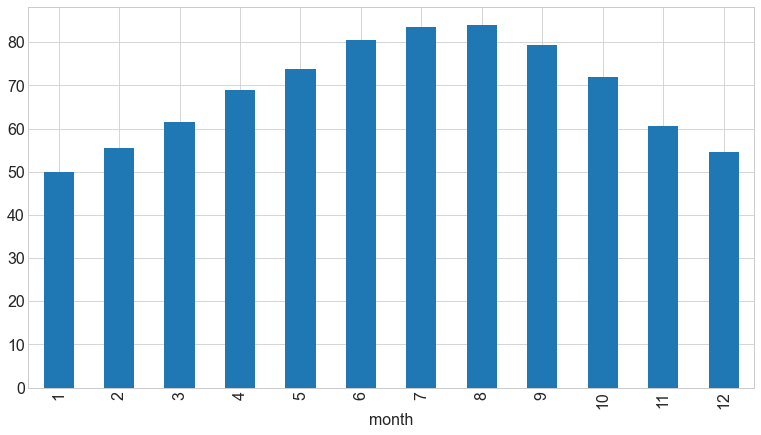

In [23]:
#Plot mean temperature by month (bar plot)
train.groupby('month').temp.mean().plot.bar()

In [ ]:
# can see how the temperatures risse and fall during diff seasons

In [24]:
#new column named weekday to display the day of the week
train['weekday'] = y.index.day_name()


<ipython-input-24-af5d687ad5d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekday'] = y.index.day_name()


In [25]:
# Plot mean temperature by weekday
train.groupby('weekday').temp.mean()

weekday
Friday       68.170992
Monday       68.326222
Saturday     68.376767
Sunday       68.551504
Thursday     68.195680
Tuesday      68.417980
Wednesday    68.481428
Name: temp, dtype: float64

<AxesSubplot:xlabel='weekday'>

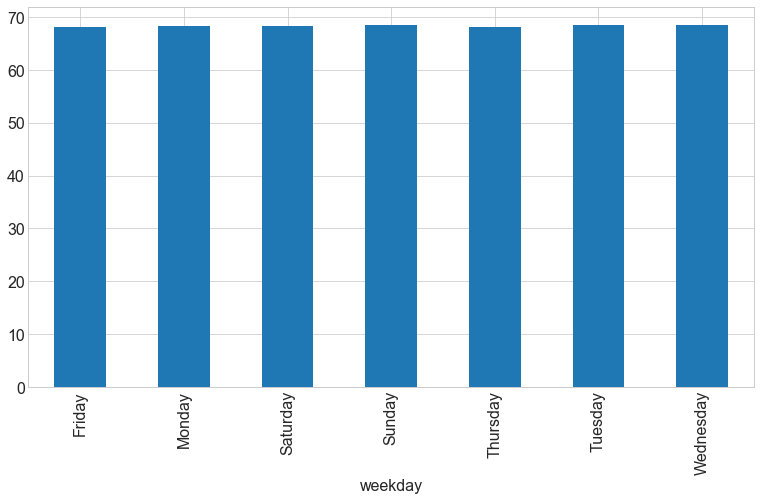

In [26]:
train.groupby('weekday').temp.mean().plot.bar()

In [ ]:
#dont see seasonailty based on weekday, which we shouldnt

#### What if we want to visualize more than just the mean temperature?

In [ ]:
#is there variations in weekday?  is there diff temps on fridays?

In [27]:
train.groupby('weekday').describe()


temp                                                      \
            count       mean        std      min       25%        50%   
weekday                                                                 
Friday     5328.0  68.170992  15.382317  24.7820  58.21550  71.105000   
Monday     5315.0  68.326222  15.330057  24.6560  58.54190  70.952000   
Saturday   5328.0  68.376767  14.682317  26.4740  59.34200  70.159805   
Sunday     5304.0  68.551504  14.673979  27.8780  59.68400  70.195400   
Thursday   5328.0  68.195680  15.571015  27.2078  57.59600  71.348000   
Tuesday    5328.0  68.417980  15.380445  17.4200  58.50950  71.432678   
Wednesday  5328.0  68.481428  15.146799  26.1500  57.98975  71.280884   

                                 month                                     \
                 75%       max   count      mean       std  min  25%  50%   
weekday                                                                     
Friday     78.476000  102.0920  5328.0  6.747748  3.518541  1.0  4.0  7.0   
Monday     79.034000  101.5160  5315.0  6.825588  3.501957  1.0  4.0  7.0   
Saturday   78.587375  101.8040  5328.0  6.779279  3.520021  1.0  4.0  7.0   
Sunday     78.836000  104.5400  5304.0  6.787330  3.506630  1.0  4.0  7.0   
Thursday   79.235660  102.0380  5328.0  6.765766  3.528736  1.0  4.0  7.0   
Tuesday    79.160000  101.6600  5328.0  6.815315  3.511847  1.0  4.0  7.0   
Wednesday  79.206350  100.7138  5328.0  6.788288  3.510321  1.0  4.0  7.0   

                       
            75%   max  
weekday                
Friday     10.0  12.0  
Monday     10.0  12.0  
Saturday   10.0  12.0  
Sunday     10.0  12.0  
Thursday   10.0  12.0  
Tuesday    10.0  12.0  
Wednesday  10.0  12.0

<AxesSubplot:xlabel='weekday', ylabel='temp'>

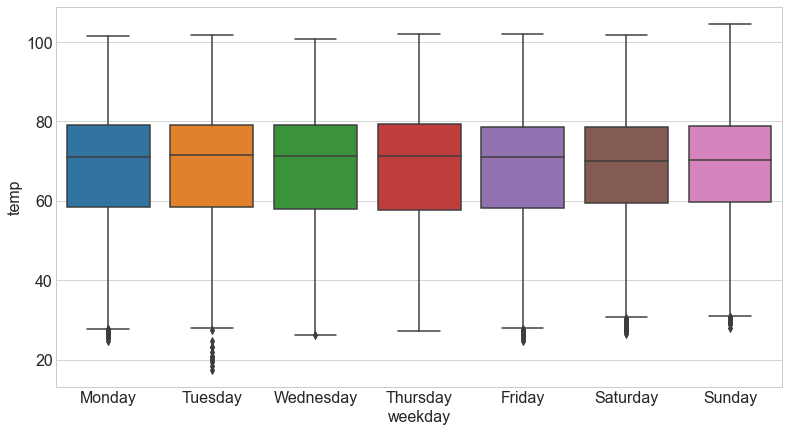

In [28]:
#capture median, iqrs, a goodway to look when you want ot see more than just mean
sns.boxplot(data = train, x = 'weekday', y = 'temp')


In [ ]:
# no trends between weekdays

<AxesSubplot:xlabel='month', ylabel='temp'>

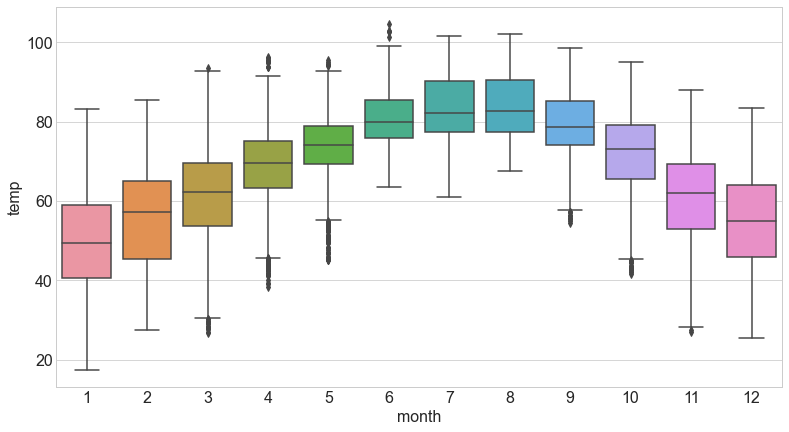

In [29]:
# Anything interesting in the chart above?

# Would the monthly boxplot look different?
sns.boxplot(data = train, x = 'month', y = 'temp')


In [ ]:
#more variation in temps in fall/winter
#less variation in temps in summer months

In [ ]:
#can see seasonality, can see low temps in jan, hot temps in summer, bigger spread of temps, more vairation in fall and winter than in summer

### Visualize the target over time

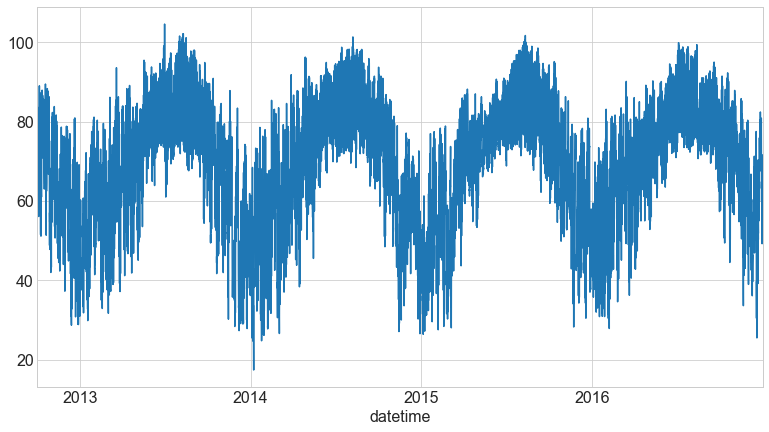

In [30]:
y.plot();

In [32]:
#verify its every 6 hours
y.resample('6h').mean()

datetime
2012-10-01 12:00:00    61.146926
2012-10-01 18:00:00    61.484289
2012-10-02 00:00:00    61.860647
2012-10-02 06:00:00    62.237005
2012-10-02 12:00:00    67.857637
                         ...    
2016-12-30 18:00:00    54.620000
2016-12-31 00:00:00    51.869000
2016-12-31 06:00:00    52.493000
2016-12-31 12:00:00    54.998000
2016-12-31 18:00:00    67.256000
Freq: 6H, Name: temp, Length: 6210, dtype: float64

<AxesSubplot:title={'center':'6 hour average'}, xlabel='datetime'>

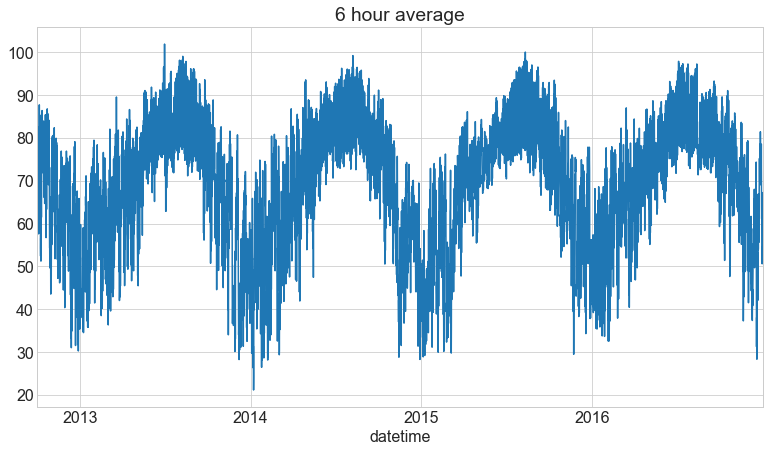

In [31]:
#supress noise by aggregating over bigger time period
y.resample('6H').mean().plot(title='6 hour average')


In [ ]:
#still see day to day noise

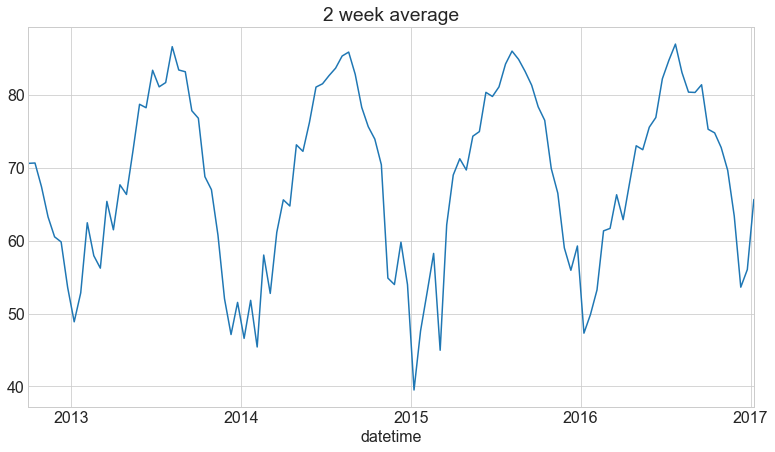

In [33]:
#2 week resample
y.resample('2W').mean().plot(title='2 week average');


In [ ]:
#day to day noise is gone

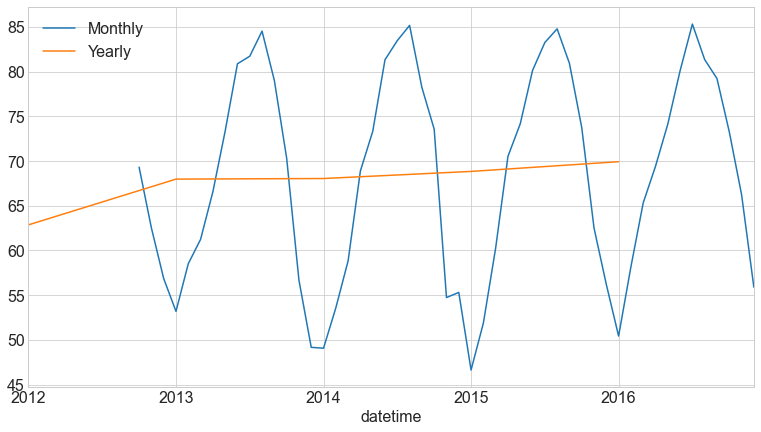

In [34]:

y.resample('M').mean().plot(label = 'Monthly')
y.resample('Y').mean().plot(label = 'Yearly')
plt.legend()

In [ ]:
#montlhy less noisy than weekly

In [ ]:
#yearly even less noisy than weekly with only 5 datapoints

<AxesSubplot:xlabel='datetime'>

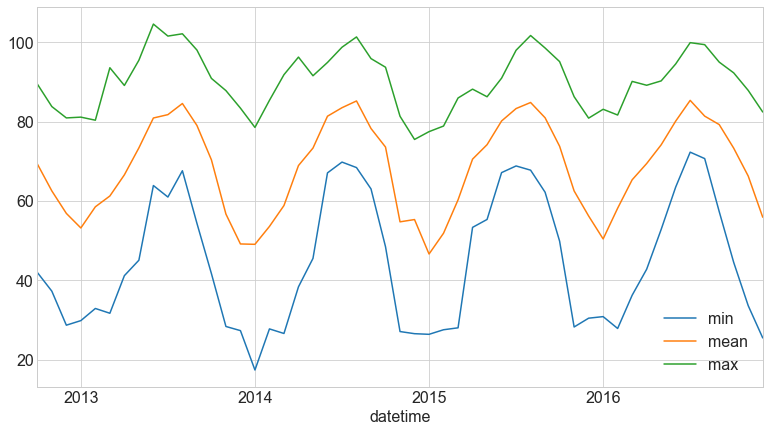

In [35]:
#can also look at min and max temperatures
y.resample('M').agg(['min', 'mean', 'max']).plot()


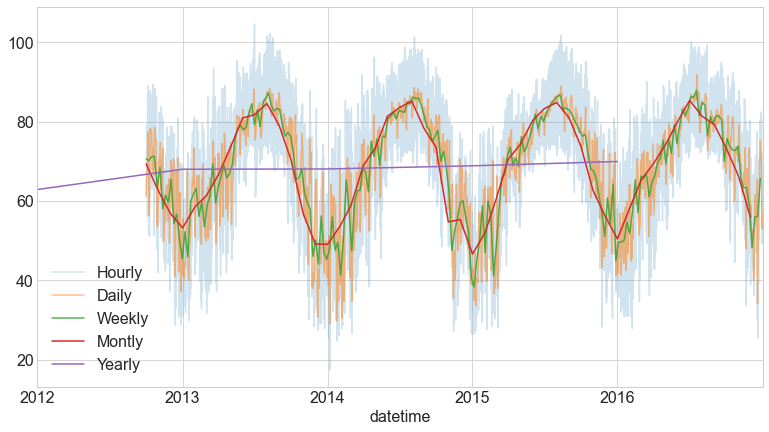

In [36]:
#use alpha to use diff colors
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()


In [ ]:
#### We can reduce noise by resampling data the data to longer frequencies.

##Seasonaility to Trend

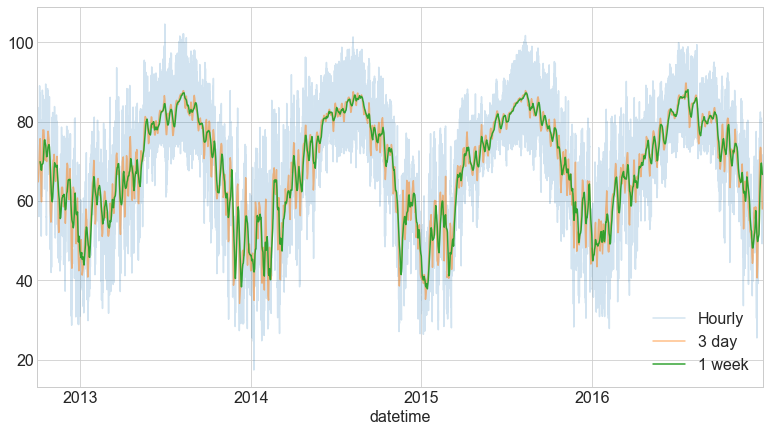

In [37]:
#rolling averages, looking at previous time and using mean of whatever aggregation you are rolling
#previous 3 day meann and 1 week mean
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

### Visualize change over time

<AxesSubplot:title={'center':'Average week-to-week change in temperature'}, xlabel='datetime'>

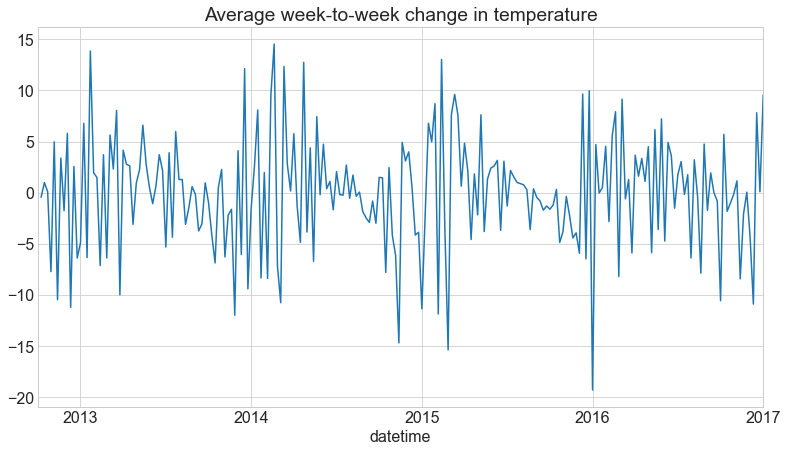

In [38]:
#resample weekly
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')


In [ ]:
# shows the differences in temperatures for each month
# bigger changes in temperature in fall/winter
# higher temp swings in fall/winter months

<AxesSubplot:title={'center':'Average month-to-month change in temperature'}, xlabel='datetime'>

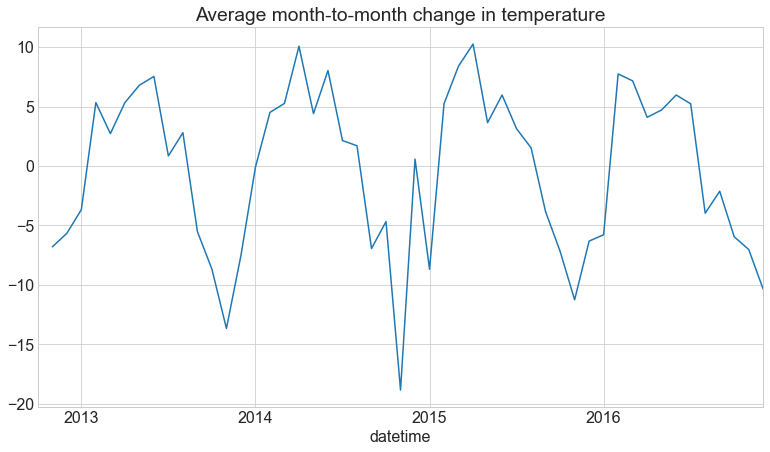

In [39]:
#compare this week temp to a temp a week from now and look at diff
#how then temp changes from this week to next week
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')


### Seasonal Plot
* comparison of multiple years together.

In [40]:
y

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
                         ...    
2016-12-31 19:00:00    63.230000
2016-12-31 20:00:00    68.216000
2016-12-31 21:00:00    70.664000
2016-12-31 22:00:00    71.348000
2016-12-31 23:00:00    71.600000
Name: temp, Length: 37259, dtype: float64

In [41]:
y.groupby([y.index.year, y.index.month]).mean()

datetime  datetime
2012      10          69.318705
          11          62.521575
          12          56.860014
2013      1           53.192333
          2           58.522799
          3           61.244479
          4           66.569717
          5           73.358529
          6           80.885728
          7           81.731819
          8           84.534117
          9           79.016805
          10          70.343832
          11          56.686028
          12          49.165310
2014      1           49.072897
          2           53.579080
          3           58.842459
          4           68.908933
          5           73.311970
          6           81.337658
          7           83.476876
          8           85.178102
          9           78.238621
          10          73.567252
          11          54.735951
          12          55.311824
2015      1           46.631940
          2           51.874683
          3           60.277705
          4          

In [42]:
Unstack 0 takes left most index and moves that from index to columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

datetime,2012,2013,2014,2015,2016
datetime,,,,,
1,NaN,53.192333,49.072897,46.631940,50.427347
2,NaN,58.522799,53.579080,51.874683,58.165749
3,NaN,61.244479,58.842459,60.277705,65.323011
4,NaN,66.569717,68.908933,70.526879,69.415316
5,NaN,73.358529,73.311970,74.169747,74.129780
6,NaN,80.885728,81.337658,80.135967,80.097570
7,NaN,81.731819,83.476876,83.264325,85.325640
8,NaN,84.534117,85.178102,84.789859,81.357023
9,NaN,79.016805,78.238621,80.938208,79.233476


<AxesSubplot:xlabel='datetime'>

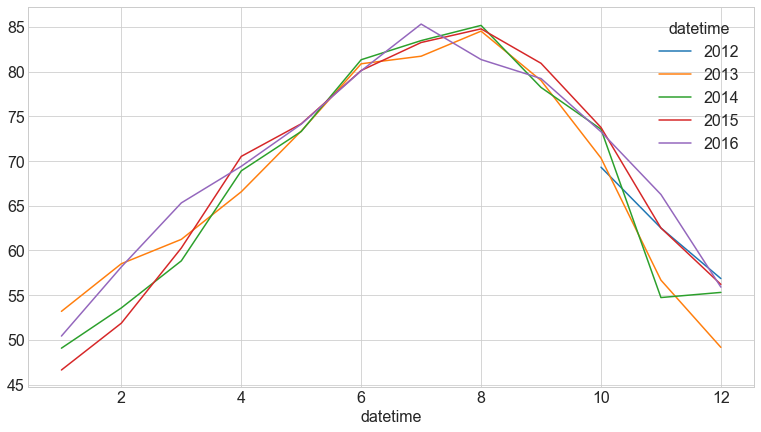

In [43]:
# one season in one year
#unstack is similar to pivot_table. It turns an index level into columns
#gropupby year and month,
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

### Seasonal Subseries Plot
* A seasonal subseries plot shows the change year-over-year within each month.

In [44]:
#unstack months rightmost leave as is -1 default
table = y.groupby([y.index.year, y.index.month]).mean().unstack()


<AxesSubplot:xlabel='datetime'>

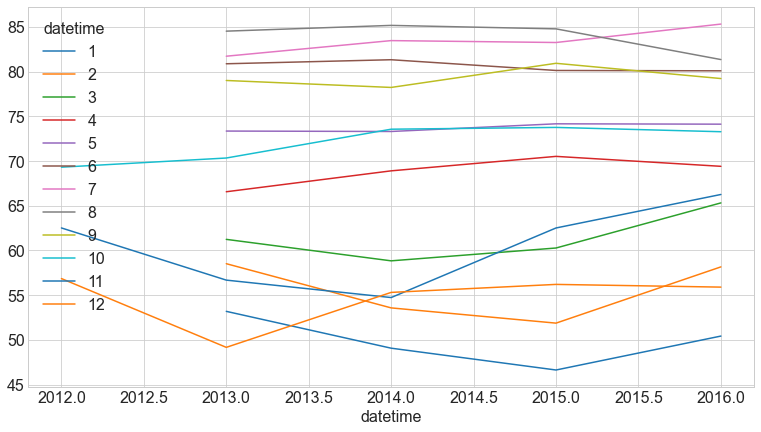

In [46]:
table.plot()


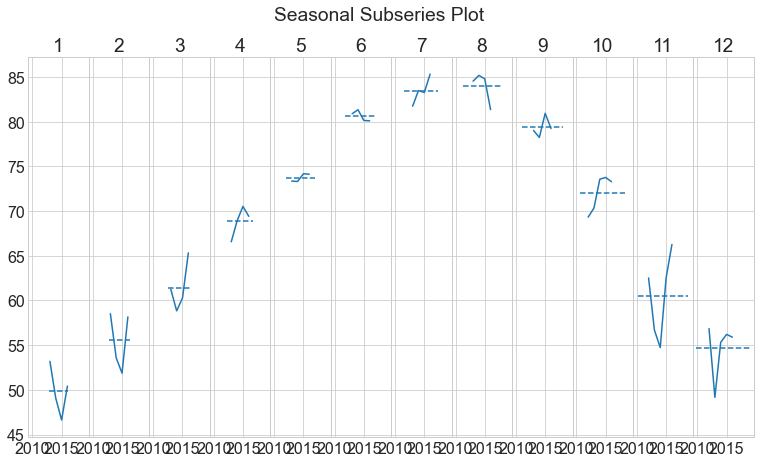

In [47]:
#make 12 subplots, zip 12 axes and iteraate through table, first axis and first column of table etc
#plot each pair
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### As with the monthly box plot, the seasonal pattern is quite evident in the seasonal subseries.¶
* Do the data exhibit a seasonal pattern?
* What is the nature of the seasonality?
* Is there a within-group pattern (e.g., do January and July exhibit similar patterns)?
* Are there any outliers once seasonality has been accounted for?

* Should I use box plot instead?

### What if seasonality is not that readily apparent?
Is there a seasonality in this data?

### Lag plot

In [49]:
#moved it one time period up
y.shift(-1)

datetime
2012-10-01 13:00:00    61.076568
2012-10-01 14:00:00    61.139294
2012-10-01 15:00:00    61.202020
2012-10-01 16:00:00    61.264747
2012-10-01 17:00:00    61.327473
                         ...    
2016-12-31 19:00:00    68.216000
2016-12-31 20:00:00    70.664000
2016-12-31 21:00:00    71.348000
2016-12-31 22:00:00    71.600000
2016-12-31 23:00:00          NaN
Name: temp, Length: 37259, dtype: float64

Text(0.5, 1.0, 'Lag plot with lag = 1')

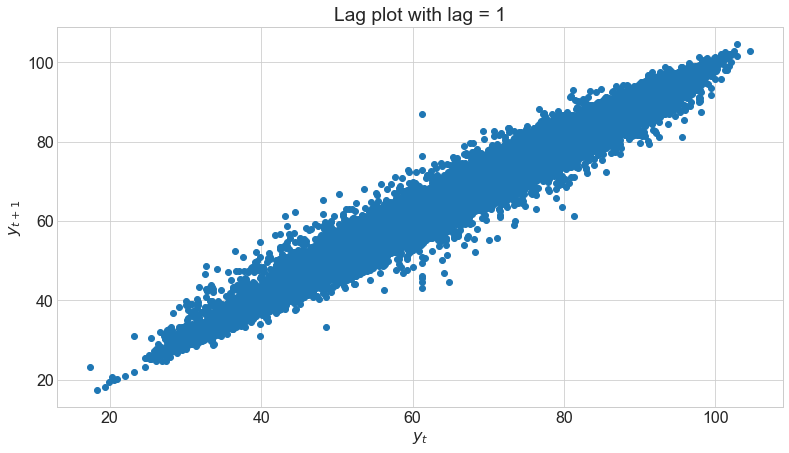

In [50]:
#correlation plot of todays data with tomorrows data

plt.scatter(y, y.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

In [ ]:
#sampled by hour
#compariing one hour to the next hour
#some corrleation between temperature from one hour to next hour

<AxesSubplot:xlabel='temp', ylabel='temp_next_day'>

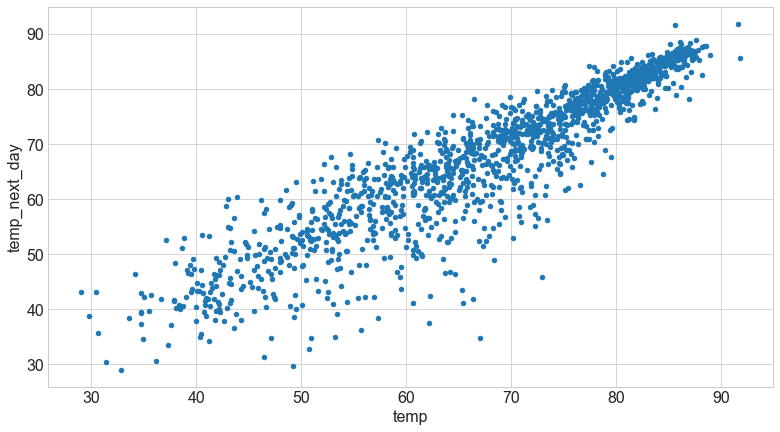

In [51]:
#daily todays mean temp to tomorrows mean temp
daily = train.resample('D').mean()
daily['temp_next_day'] = daily.temp.shift(-1)
daily.plot.scatter(x='temp', y='temp_next_day')

In [ ]:
# correlation is not as strong
# 

In [52]:
# sample data weekly, compare this weeks temp to next weeks temp for all the weeks we have
#hour to day to week the size of the dataframe observation is getting less and less
weekly = train.resample('W').mean()
weekly['temp_next_week'] = weekly.temp.shift(-1)

weekly

,temp,month,temp_next_week
datetime,,,
2012-10-07,70.595201,10.000000,70.152821
2012-10-14,70.152821,10.000000,71.138375
2012-10-21,71.138375,10.000000,71.230464
2012-10-28,71.230464,10.000000,63.510554
2012-11-04,63.510554,10.571429,68.482625
...,...,...,...
2016-12-04,59.062094,11.571429,48.163625
2016-12-11,48.163625,12.000000,55.979132
2016-12-18,55.979132,12.000000,56.073143


<AxesSubplot:xlabel='temp', ylabel='temp_next_week'>

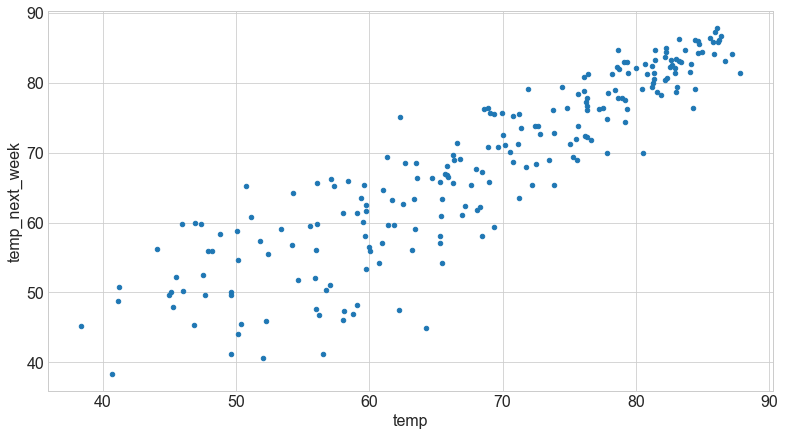

In [53]:
weekly.plot.scatter(x='temp', y='temp_next_week')


,this_week,month,12_weeks_out
datetime,,,
2012-10-07,70.595201,10.000000,50.376741
2012-10-14,70.152821,10.000000,45.473616
2012-10-21,71.138375,10.000000,52.252877
2012-10-28,71.230464,10.000000,45.907936
2012-11-04,63.510554,10.571429,59.763739
...,...,...,...
2016-12-04,59.062094,11.571429,NaN
2016-12-11,48.163625,12.000000,NaN
2016-12-18,55.979132,12.000000,NaN


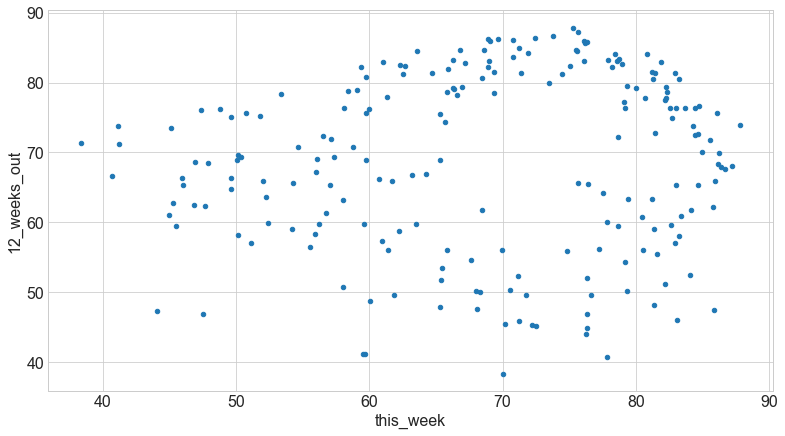

In [54]:
#every three months compare one quarter temperature with the next quarters temperature
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,month,26_weeks_out
datetime,,,
2012-10-07,70.595201,10.000000,63.558611
2012-10-14,70.152821,10.000000,66.345532
2012-10-21,71.138375,10.000000,68.965502
2012-10-28,71.230464,10.000000,65.862071
2012-11-04,63.510554,10.571429,66.797107
...,...,...,...
2016-12-04,59.062094,11.571429,NaN
2016-12-11,48.163625,12.000000,NaN
2016-12-18,55.979132,12.000000,NaN


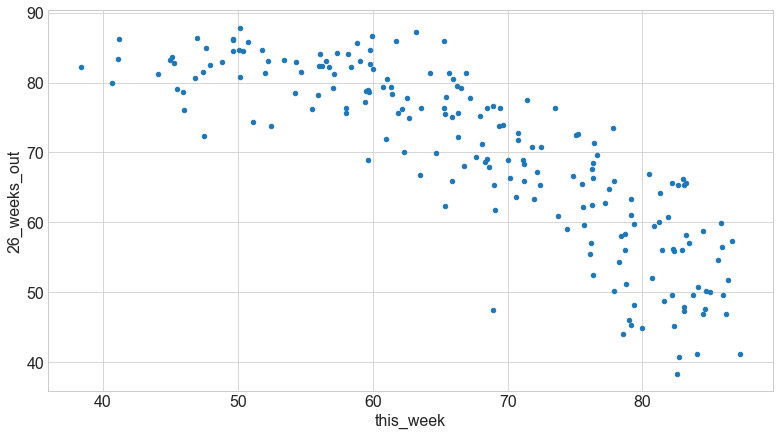

In [55]:
weekly = train.resample('W').mean()
weekly['26_weeks_out'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='26_weeks_out')
weekly

In [ ]:
#negative corrleation, seasonality seen, temp flips every 6 months

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

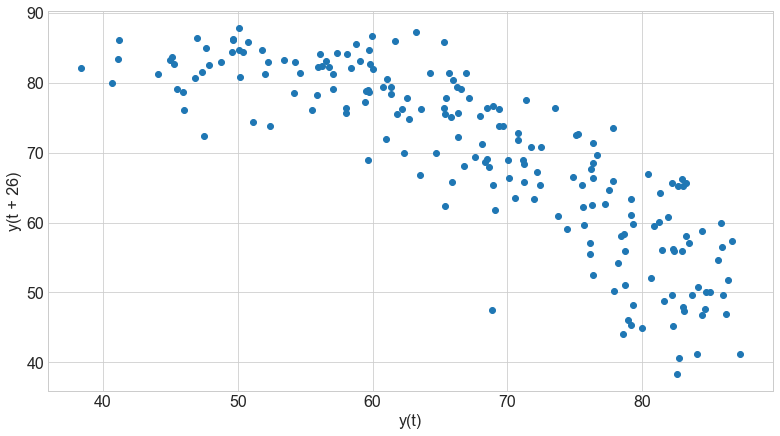

In [56]:
# easier way. Use pd.plotting.lag_plot(series, lag):
#lag is the xtime period
pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=26)

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

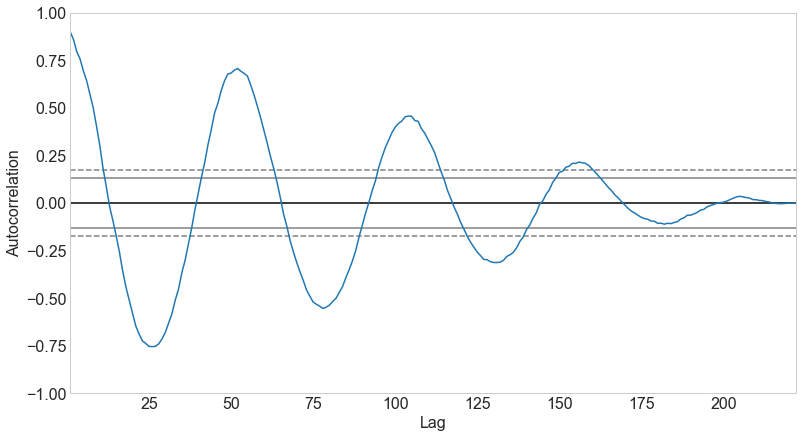

In [57]:
# r correlation value on y axis
# horizontal lines are the confidence intervals
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())


### What does autocorrelation plot look like for white noise

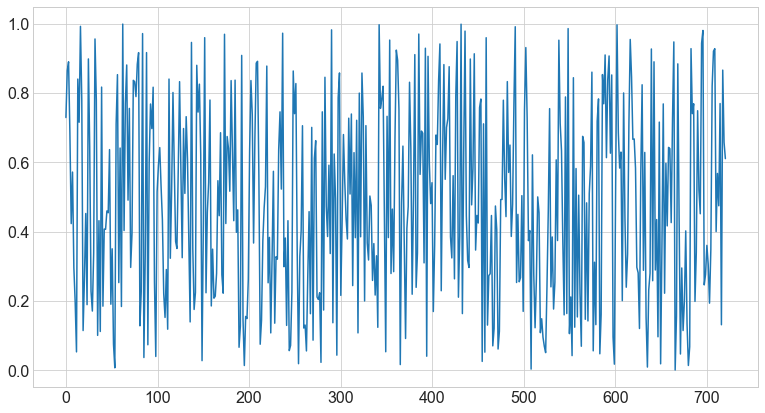

In [58]:
# random data generated to show noise
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
# result_curve =  noise
plt.plot(grid, noise)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


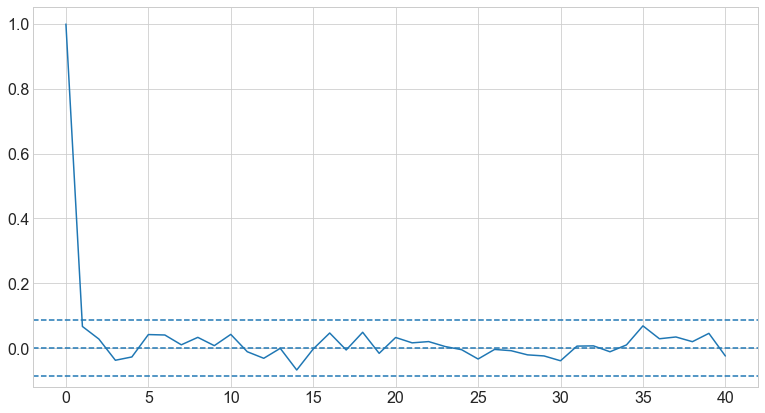

In [59]:

from statsmodels.tsa import stattools

acf_result = stattools.acf(noise)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(noise)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(noise)),linestyle='--')

### Seasonal Decomposition
$$ y = S + T + \epsilon $$
Seasonality + Trend + Residual

In [60]:
#time series data we have has 3 components, add all 3
#by defaulut the model is additive
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [61]:
result.seasonal


datetime
2012-10-07     8.545501
2012-10-14     7.255470
2012-10-21     2.468309
2012-10-28     1.820126
2012-11-04    -0.114287
                ...    
2016-12-04   -14.650102
2016-12-11   -13.263237
2016-12-18   -12.765114
2016-12-25   -13.857895
2017-01-01   -24.587601
Freq: W-SUN, Name: seasonal, Length: 222, dtype: float64

In [62]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
datetime,,,,
2012-10-07,70.595201,NaN,8.545501,NaN
2012-10-14,70.152821,NaN,7.255470,NaN
2012-10-21,71.138375,NaN,2.468309,NaN
2012-10-28,71.230464,NaN,1.820126,NaN
2012-11-04,63.510554,NaN,-0.114287,NaN


<AxesSubplot:xlabel='datetime'>

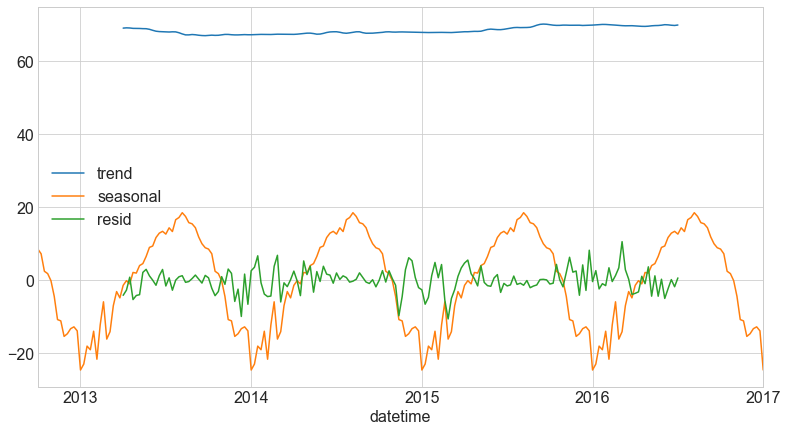

In [63]:
decomposition.iloc[:, 1:].plot()


In [ ]:
#can clearly see trend line
#some seasonality
#some residual noise/error


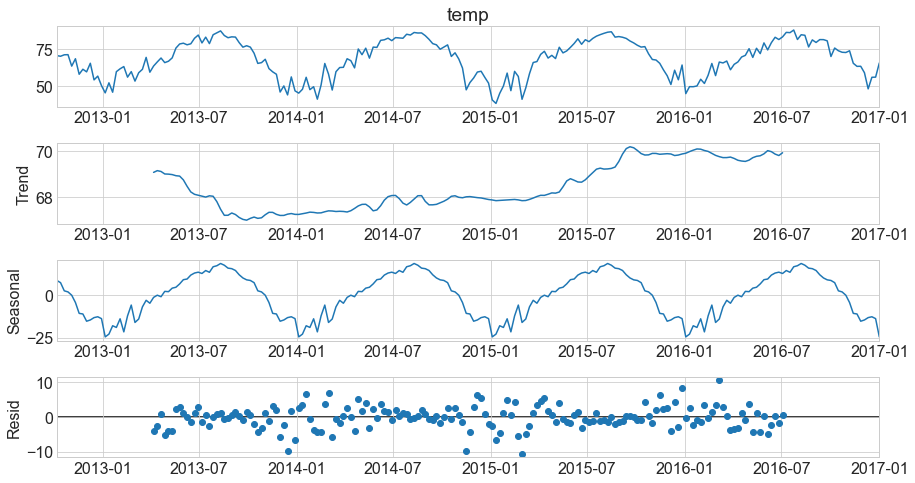

In [64]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Additive or multiplicative seasonality?¶
The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative model is more appropriate.

https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/

### Categories over time¶


In [65]:
train = train.resample('D').mean()
train.head()

,temp,month
datetime,,
2012-10-01,61.330942,10
2012-10-02,65.678822,10
2012-10-03,67.411250,10
2012-10-04,67.703750,10
2012-10-05,77.073125,10


In [67]:
train.head()


,temp,month,temp_bin
datetime,,,
2012-10-01,61.330942,10,cool
2012-10-02,65.678822,10,cool
2012-10-03,67.411250,10,cool
2012-10-04,67.703750,10,cool
2012-10-05,77.073125,10,warm


In [66]:
# create a categorical feature
# divide into four bins 
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').temp.mean()

temp_bin
cold    49.381699
cool    65.200219
warm    75.447977
hot     83.449087
Name: temp, dtype: float64


How can we visualize the temp_bin feature over time?

In [72]:
train.groupby('temp_bin').resample('M').size()

temp_bin  datetime  
cold      2012-10-31     6
          2012-11-30    10
          2012-12-31    16
          2013-01-31    24
          2013-02-28    17
                        ..
hot       2016-06-30    19
          2016-07-31    28
          2016-08-31    21
          2016-09-30    18
          2016-10-31     5
Length: 195, dtype: int64

In [73]:
#unstack it 
train.groupby('temp_bin').resample('M').size().unstack(0)

temp_bin,cold,cool,warm,hot
datetime,,,,
2012-10-31,6.0,9.0,16.0,NaN
2012-11-30,10.0,16.0,4.0,NaN
2012-12-31,16.0,14.0,1.0,NaN
2013-01-31,24.0,5.0,2.0,NaN
2013-02-28,17.0,11.0,0.0,NaN
2013-03-31,11.0,16.0,4.0,NaN
2013-04-30,7.0,14.0,9.0,NaN
2013-05-31,1.0,8.0,16.0,6.0
2013-06-30,0.0,0.0,12.0,18.0


In [74]:
#fill nans with 0
train.groupby('temp_bin').resample('M').size().unstack(0).fillna(0)

temp_bin,cold,cool,warm,hot
datetime,,,,
2012-10-31,6.0,9.0,16.0,0.0
2012-11-30,10.0,16.0,4.0,0.0
2012-12-31,16.0,14.0,1.0,0.0
2013-01-31,24.0,5.0,2.0,0.0
2013-02-28,17.0,11.0,0.0,0.0
2013-03-31,11.0,16.0,4.0,0.0
2013-04-30,7.0,14.0,9.0,0.0
2013-05-31,1.0,8.0,16.0,6.0
2013-06-30,0.0,0.0,12.0,18.0


Text(0, 0.5, '% of days in the month')

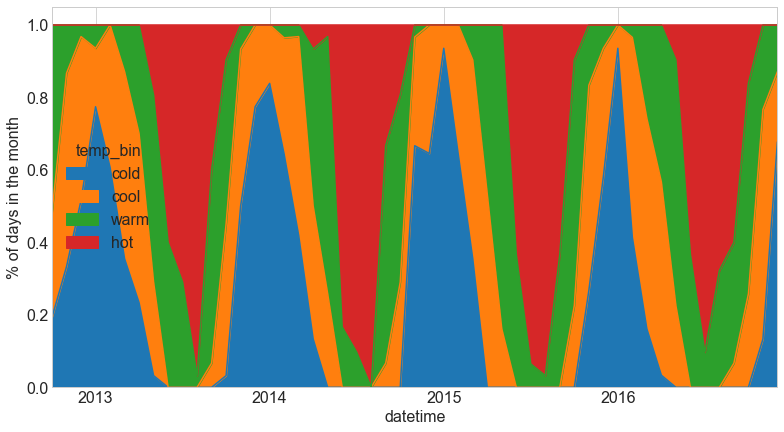

In [68]:
#
(train.groupby('temp_bin')
 .resample('M')
 .size() # like COUNT(*)
 .unstack(0) # turns an index level into columns
 .fillna(0)
 .astype(int)
 .apply(lambda row: row / row.sum(), axis=1) # raw nums to % of the row
 .plot.area()
)
plt.ylabel('% of days in the month')

In [ ]:
#

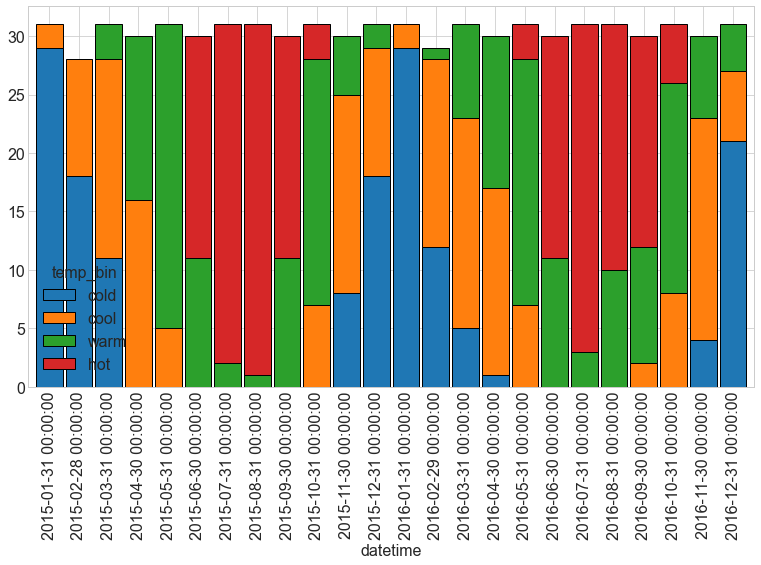

In [75]:
#took 2015 and 2016
ax = (train['2015':'2016']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)

In [76]:
# to fix the ugly aaxis
# take the existing labels, convert them to Timestamps, and then reformat with .strftime
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

In [ ]:
pd.to_datetime(ax.get_xticklabels()[0].get_text.)

### strftime

In [ ]:
#adding numbers before months will organize them by month instead of alphabetical order

In [79]:
y.index.strftime('%m-%b')

Index(['10-Oct', '10-Oct', '10-Oct', '10-Oct', '11-Nov', '11-Nov', '11-Nov',
       '11-Nov', '12-Dec', '12-Dec',
       ...
       '10-Oct', '11-Nov', '11-Nov', '11-Nov', '11-Nov', '12-Dec', '12-Dec',
       '12-Dec', '12-Dec', '01-Jan'],
      dtype='object', name='datetime', length=222)

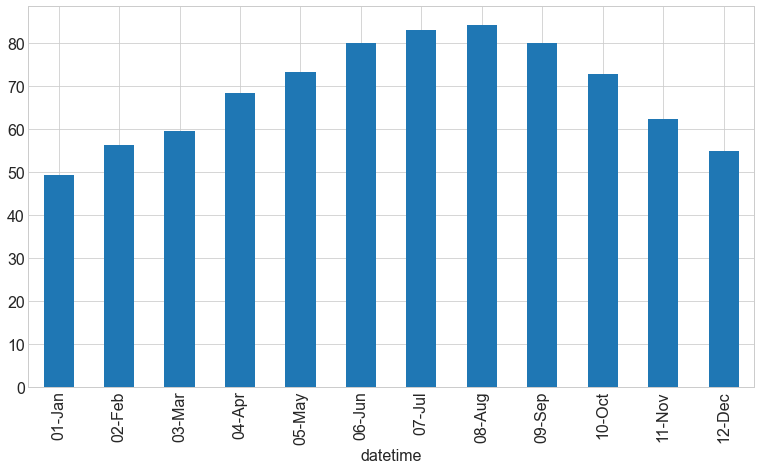

In [77]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()


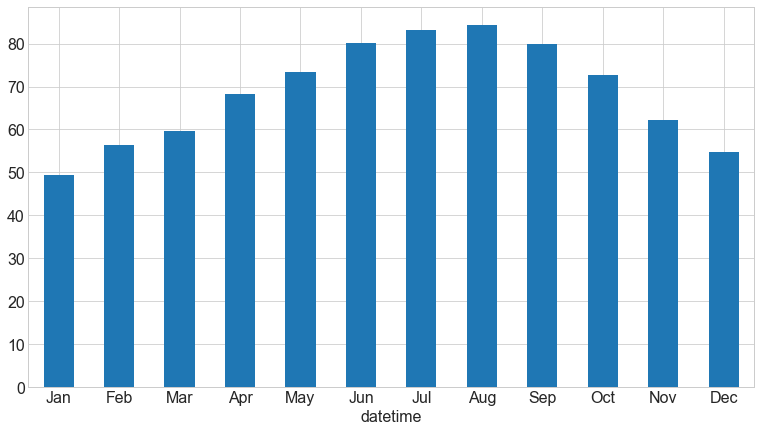

In [78]:

ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);


### Matplotlib Dates
This will only work with plt.plot or ax.plot, not with the pandas plotting!

<AxesSubplot:xlabel='datetime'>

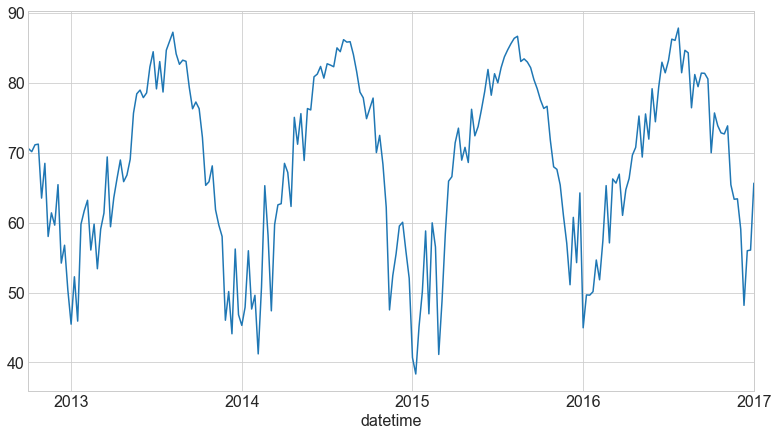

In [80]:
# how can i customize the x axis label here?

y.resample('W').mean().plot()

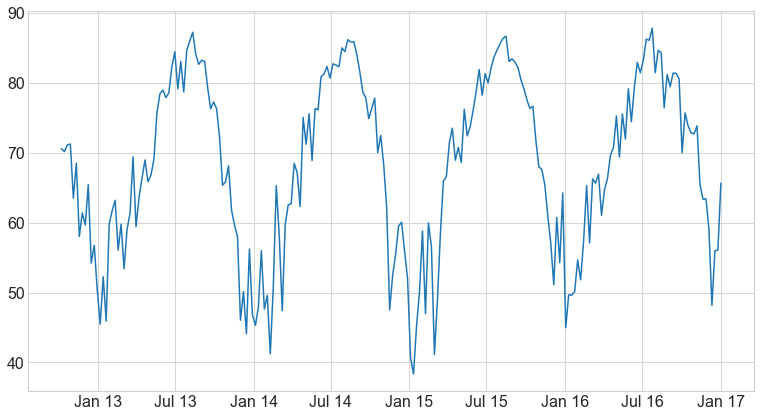

In [81]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))